In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from warnings import filterwarnings
filterwarnings('ignore')

# Loading Dataset
data = pd.read_csv("rt_iot2022.csv")
data.head()

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,0.281148,...,0.0,29729182.96,29729182.96,29729182.96,29729182.96,0.0,64240,26847,502,MQTT_Publish
1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,0.282277,...,0.0,29855277.06,29855277.06,29855277.06,29855277.06,0.0,64240,26847,502,MQTT_Publish
2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,0.280164,...,0.0,29842149.02,29842149.02,29842149.02,29842149.02,0.0,64240,26847,502,MQTT_Publish
3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,0.281593,...,0.0,29913774.97,29913774.97,29913774.97,29913774.97,0.0,64240,26847,502,MQTT_Publish
4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,0.282111,...,0.0,29814704.90,29814704.90,29814704.90,29814704.90,0.0,64240,26847,502,MQTT_Publish


# Data Understanding and Visualization

In [2]:
# Remove duplicates
data.drop_duplicates(inplace=True)

# Verify the shape of the DataFrame after removing duplicates
print("Shape of the DataFrame after removing duplicates:", data.shape)

Shape of the DataFrame after removing duplicates: (117922, 84)


In [3]:
# Data type verification
print("Data types of columns:")
print(data.dtypes)
print("\n")

Data types of columns:
id.orig_p                 int64
id.resp_p                 int64
proto                    object
service                  object
flow_duration           float64
                         ...   
idle.std                float64
fwd_init_window_size      int64
bwd_init_window_size      int64
fwd_last_window_size      int64
Attack_type              object
Length: 84, dtype: object




In [ ]:
# Count the occurrences of each class label
class_dist = data["Attack_type"].value_counts()
print("Class label counts:")
print(class_dist)

Class label counts:
Attack_type
DOS_SYN_Hping                 90089
Thing_Speak                    7654
ARP_poisioning                 7625
MQTT_Publish                   4142
NMAP_UDP_SCAN                  2584
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  533
Wipro_bulb                      219
Metasploit_Brute_Force_SSH       36
NMAP_FIN_SCAN                    28
Name: count, dtype: int64


In [ ]:
y = data["Attack_type"]

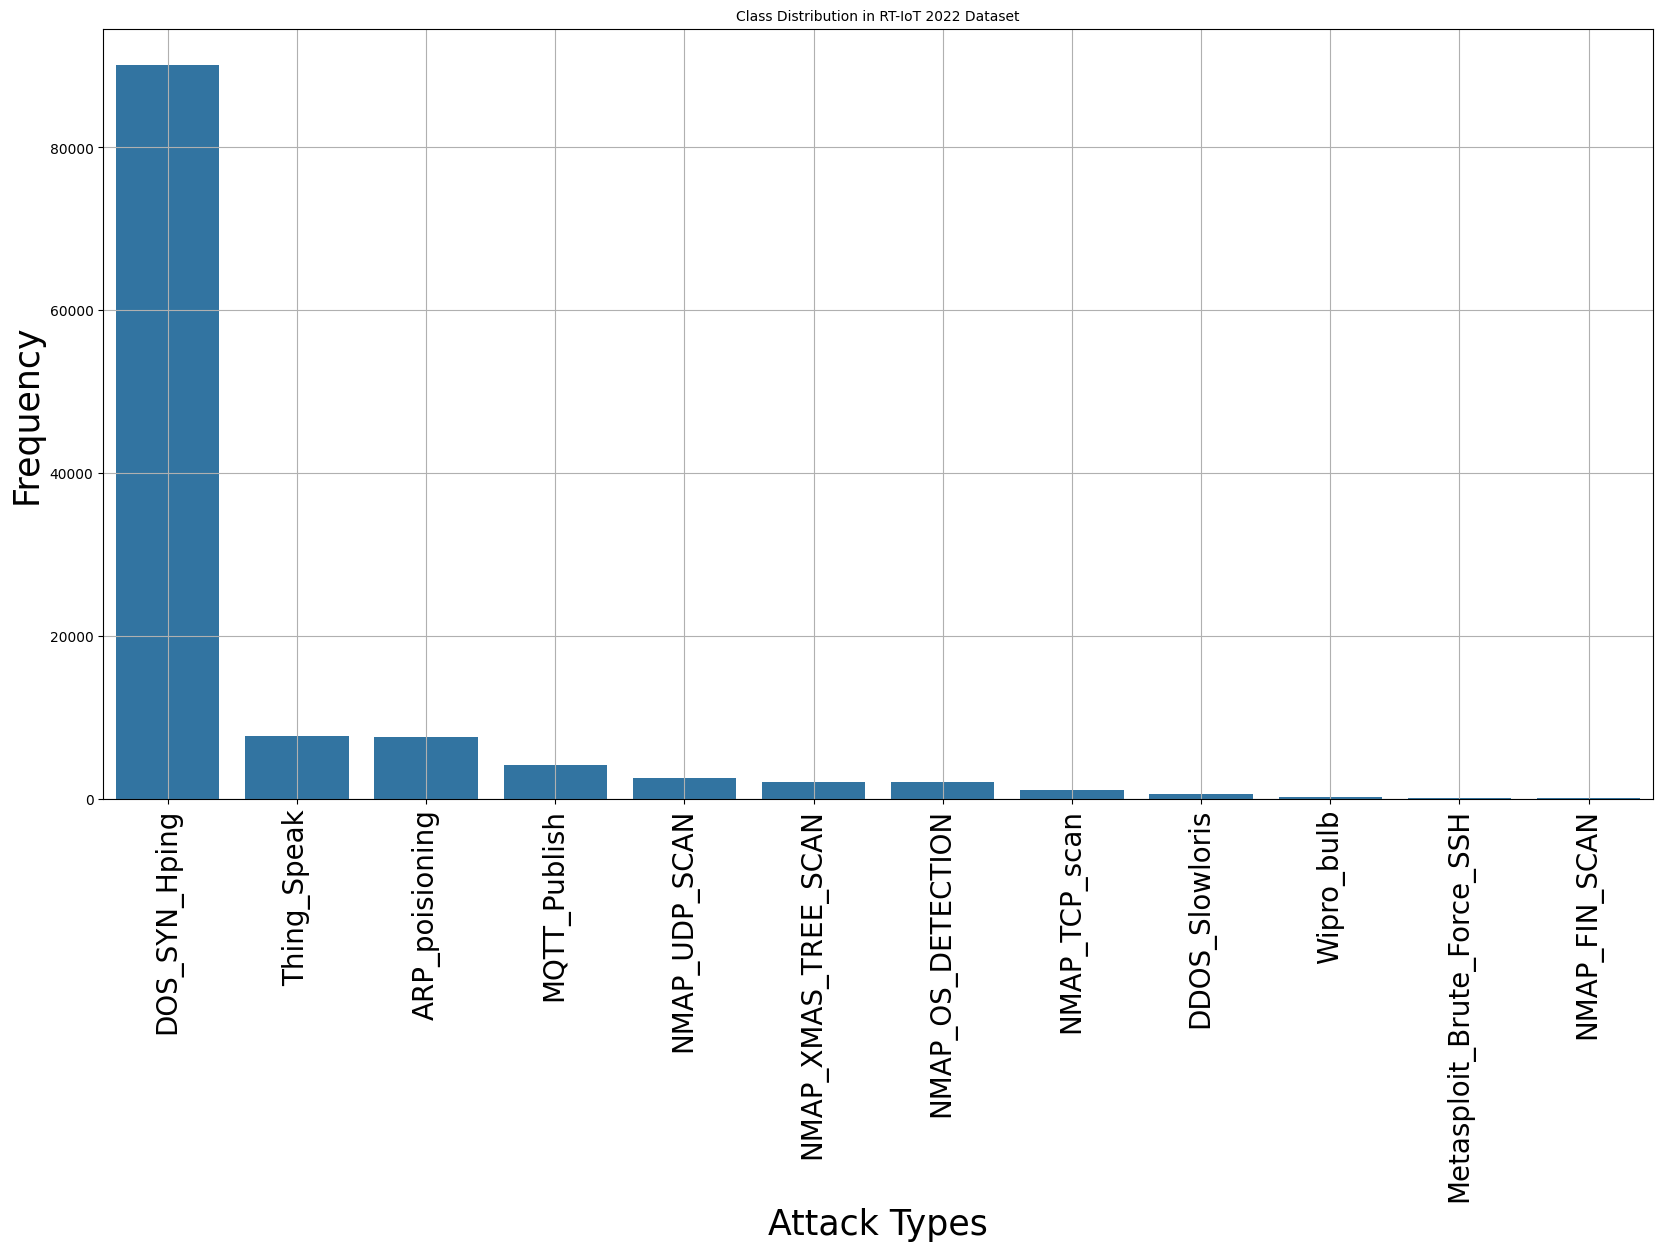

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Generate the barplot
sns.barplot(x=class_dist.index, y=class_dist.values, linewidth=2)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90, fontsize=20)

# Set labels and title with increased font size
plt.xlabel('Attack Types', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.title('Class Distribution in RT-IoT 2022 Dataset', fontsize=10)

# Adding grid
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
majority_class_count = class_dist.max()
minority_class_count = class_dist.min()
imbalance_ratio = majority_class_count / minority_class_count;
print(f"Imbalance Ratio: {imbalance_ratio:.2f}");

Imbalance Ratio: 3217.46


In [ ]:
# Count the occurrences of each class label
class_counts = data["Attack_type"].value_counts()

# Calculate the percentages
total = class_counts.sum()
percent_total = class_counts / total * 100
percent_majority = class_counts / class_counts['DOS_SYN_Hping'] * 100

# Create a DataFrame for the table
table = pd.DataFrame({
    'Normal / Attack Labels': class_counts.index,
    'Number of Instances': class_counts.values,
    '% of Prevalence w.r.t. the Majority Class': percent_majority.values,
    '% of Prevalence w.r.t. the Total Instances': percent_total.values
})

# Add a column for the index
table.reset_index(inplace=True)
table.rename(columns={'index': 'Sl No'}, inplace=True)

# Display the table
print(table)

    Sl No      Normal / Attack Labels  Number of Instances  \
0       0               DOS_SYN_Hping                90089   
1       1                 Thing_Speak                 7654   
2       2              ARP_poisioning                 7625   
3       3                MQTT_Publish                 4142   
4       4               NMAP_UDP_SCAN                 2584   
5       5         NMAP_XMAS_TREE_SCAN                 2010   
6       6           NMAP_OS_DETECTION                 2000   
7       7               NMAP_TCP_scan                 1002   
8       8              DDOS_Slowloris                  533   
9       9                  Wipro_bulb                  219   
10     10  Metasploit_Brute_Force_SSH                   36   
11     11               NMAP_FIN_SCAN                   28   

    % of Prevalence w.r.t. the Majority Class  \
0                                  100.000000   
1                                    8.496043   
2                                    8.463852 

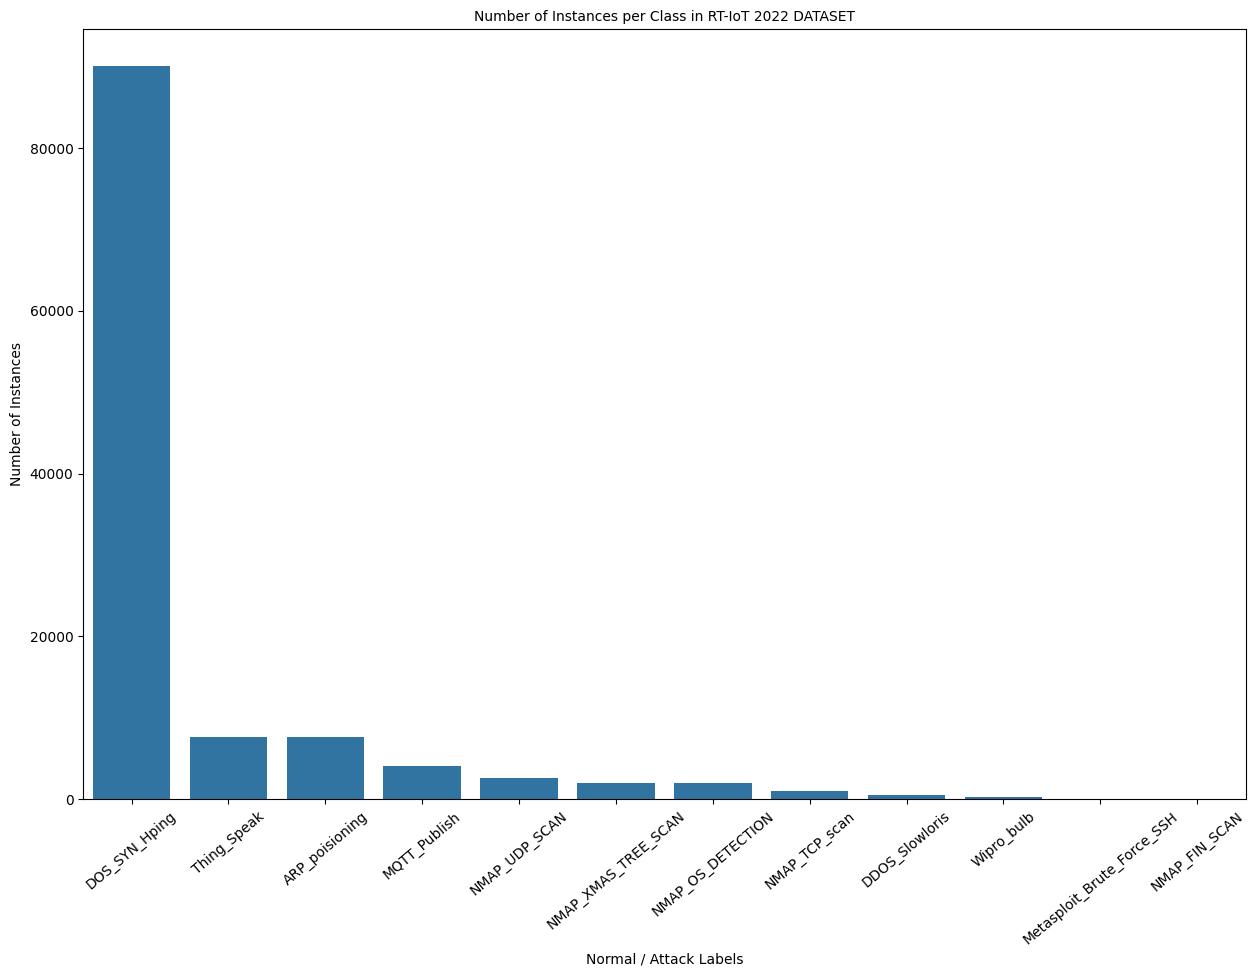

In [ ]:
# Create a bar plot for the number of instances per class
plt.figure(figsize=(15, 10))
sns.barplot(x='Normal / Attack Labels', y='Number of Instances', data=table)
plt.xticks(rotation=40)
plt.title('Number of Instances per Class in RT-IoT 2022 DATASET', fontsize=10)
plt.show()

C:\Users\patel\AppData\Local\Temp\ipykernel_7980\2047874804.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)


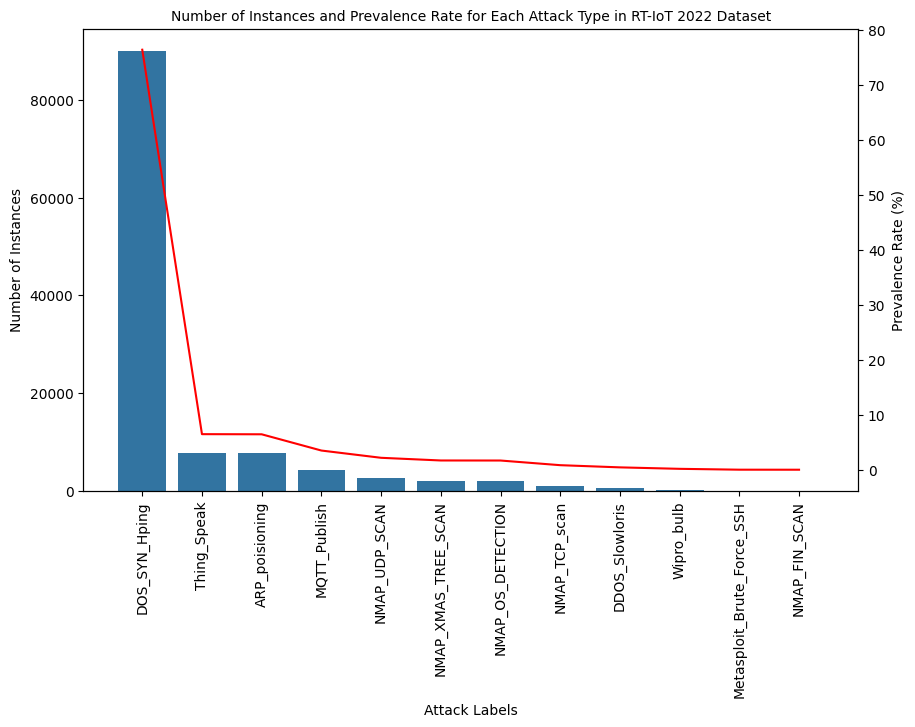

In [ ]:
from matplotlib.ticker import FuncFormatter

def to_plain(x, pos):
    # Format in plain number, not scientific notation
    return '{:.0f}'.format(x)

# Apply this formatter to the y-axis of your plot
formatter = FuncFormatter(to_plain)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Apply formatter to the y-axis
ax1.yaxis.set_major_formatter(formatter)

sns.barplot(x='Normal / Attack Labels', y='Number of Instances', data=table, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

ax2 = ax1.twinx()

# Apply formatter to the secondary y-axis
ax2.yaxis.set_major_formatter(formatter)

sns.lineplot(x='Normal / Attack Labels', y='% of Prevalence w.r.t. the Total Instances', data=table, ax=ax2, color='r')

ax1.set_xlabel('Attack Labels')
ax1.set_ylabel('Number of Instances')
ax2.set_ylabel('Prevalence Rate (%)')
plt.title('Number of Instances and Prevalence Rate for Each Attack Type in RT-IoT 2022 Dataset', fontsize=10)

plt.show()


In [ ]:
unique_labels = data["Attack_type"].unique()
print(unique_labels);

['MQTT_Publish' 'Thing_Speak' 'Wipro_bulb' 'ARP_poisioning'
 'DDOS_Slowloris' 'DOS_SYN_Hping' 'Metasploit_Brute_Force_SSH'
 'NMAP_FIN_SCAN' 'NMAP_OS_DETECTION' 'NMAP_TCP_scan' 'NMAP_UDP_SCAN'
 'NMAP_XMAS_TREE_SCAN']


In [ ]:
data.columns

Index(['id.orig_p', 'id.resp_p', 'proto', 'service', 'flow_duration',
       'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
       'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec',
       'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
       'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot',
       'bwd_header_size_min', 'bwd_header_size_max', 'flow_FIN_flag_count',
       'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count',
       'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count',
       'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
       'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'flow_pkts_payload.tot',
       '

In [ ]:
# Preprocess the data
X = data.drop(["Attack_type"], axis=1)
y = data["Attack_type"]

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# One-hot encode categorical columns
X_encoded = pd.get_dummies(X, columns=["proto", "service"])
# Initialize the scaler
scaler = StandardScaler()

# Scale the encoded data
X_scaled = scaler.fit_transform(X_encoded)

In [ ]:
# Encode the labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
X_scaled.shape, y_encoded.shape

((117922, 94), (117922,))

In [ ]:
# Fit the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y_encoded)

RandomForestClassifier(random_state=42)

(94,)


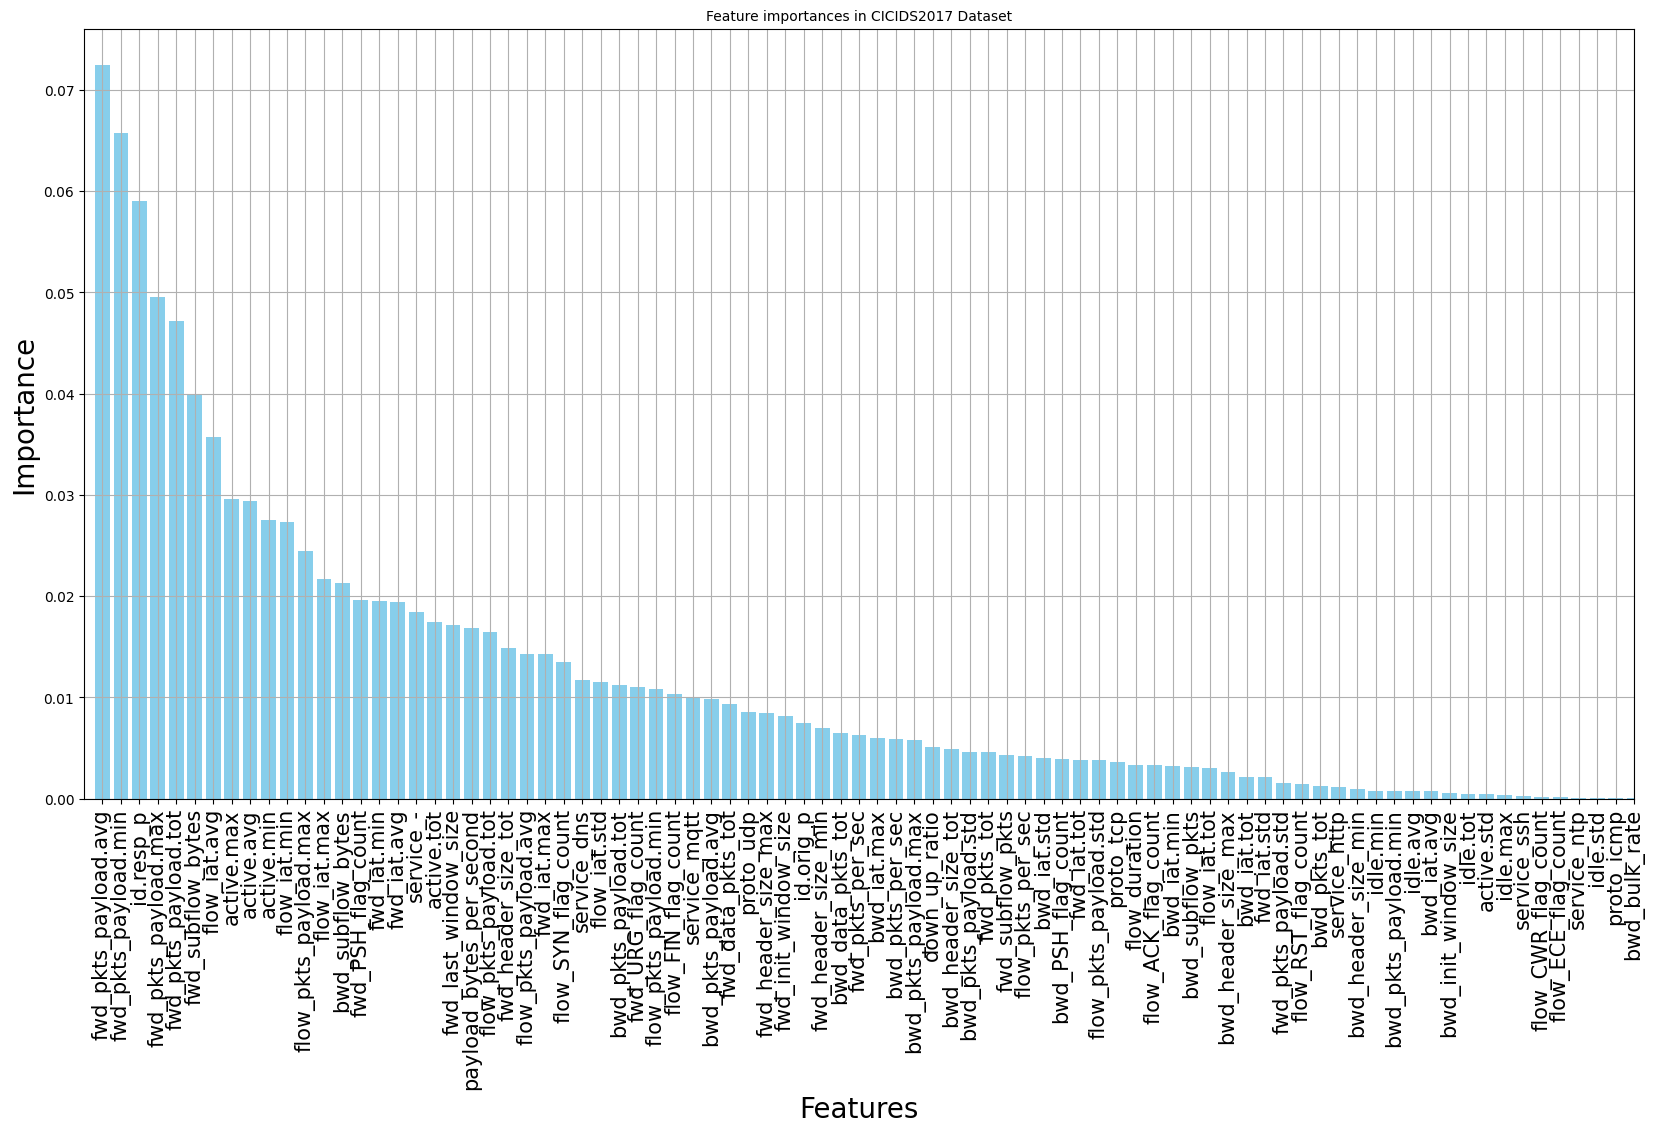

In [ ]:
# Plot feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
print(importances.shape)

# Set up the matplotlib figure
plt.figure(figsize=(20, 10))

# Generate the barplot
plt.bar(
    range(X_scaled.shape[1]),
    importances[indices],
    align="center",
    color="skyblue",
    linewidth=2,
)

# Set labels and title with increased font size
plt.xticks(
    range(X_encoded.shape[1]), X_encoded.columns[indices], rotation=90, fontsize=15
)
plt.xlabel('Features', fontsize=20)
plt.ylabel('Importance', fontsize=20)
plt.title('Feature importances in CICIDS2017 Dataset', fontsize=10)

# Set x and y axis limits
plt.xlim([-1, X.shape[1]])

# Adding grid
plt.grid(True)

# Show the plot
plt.show()

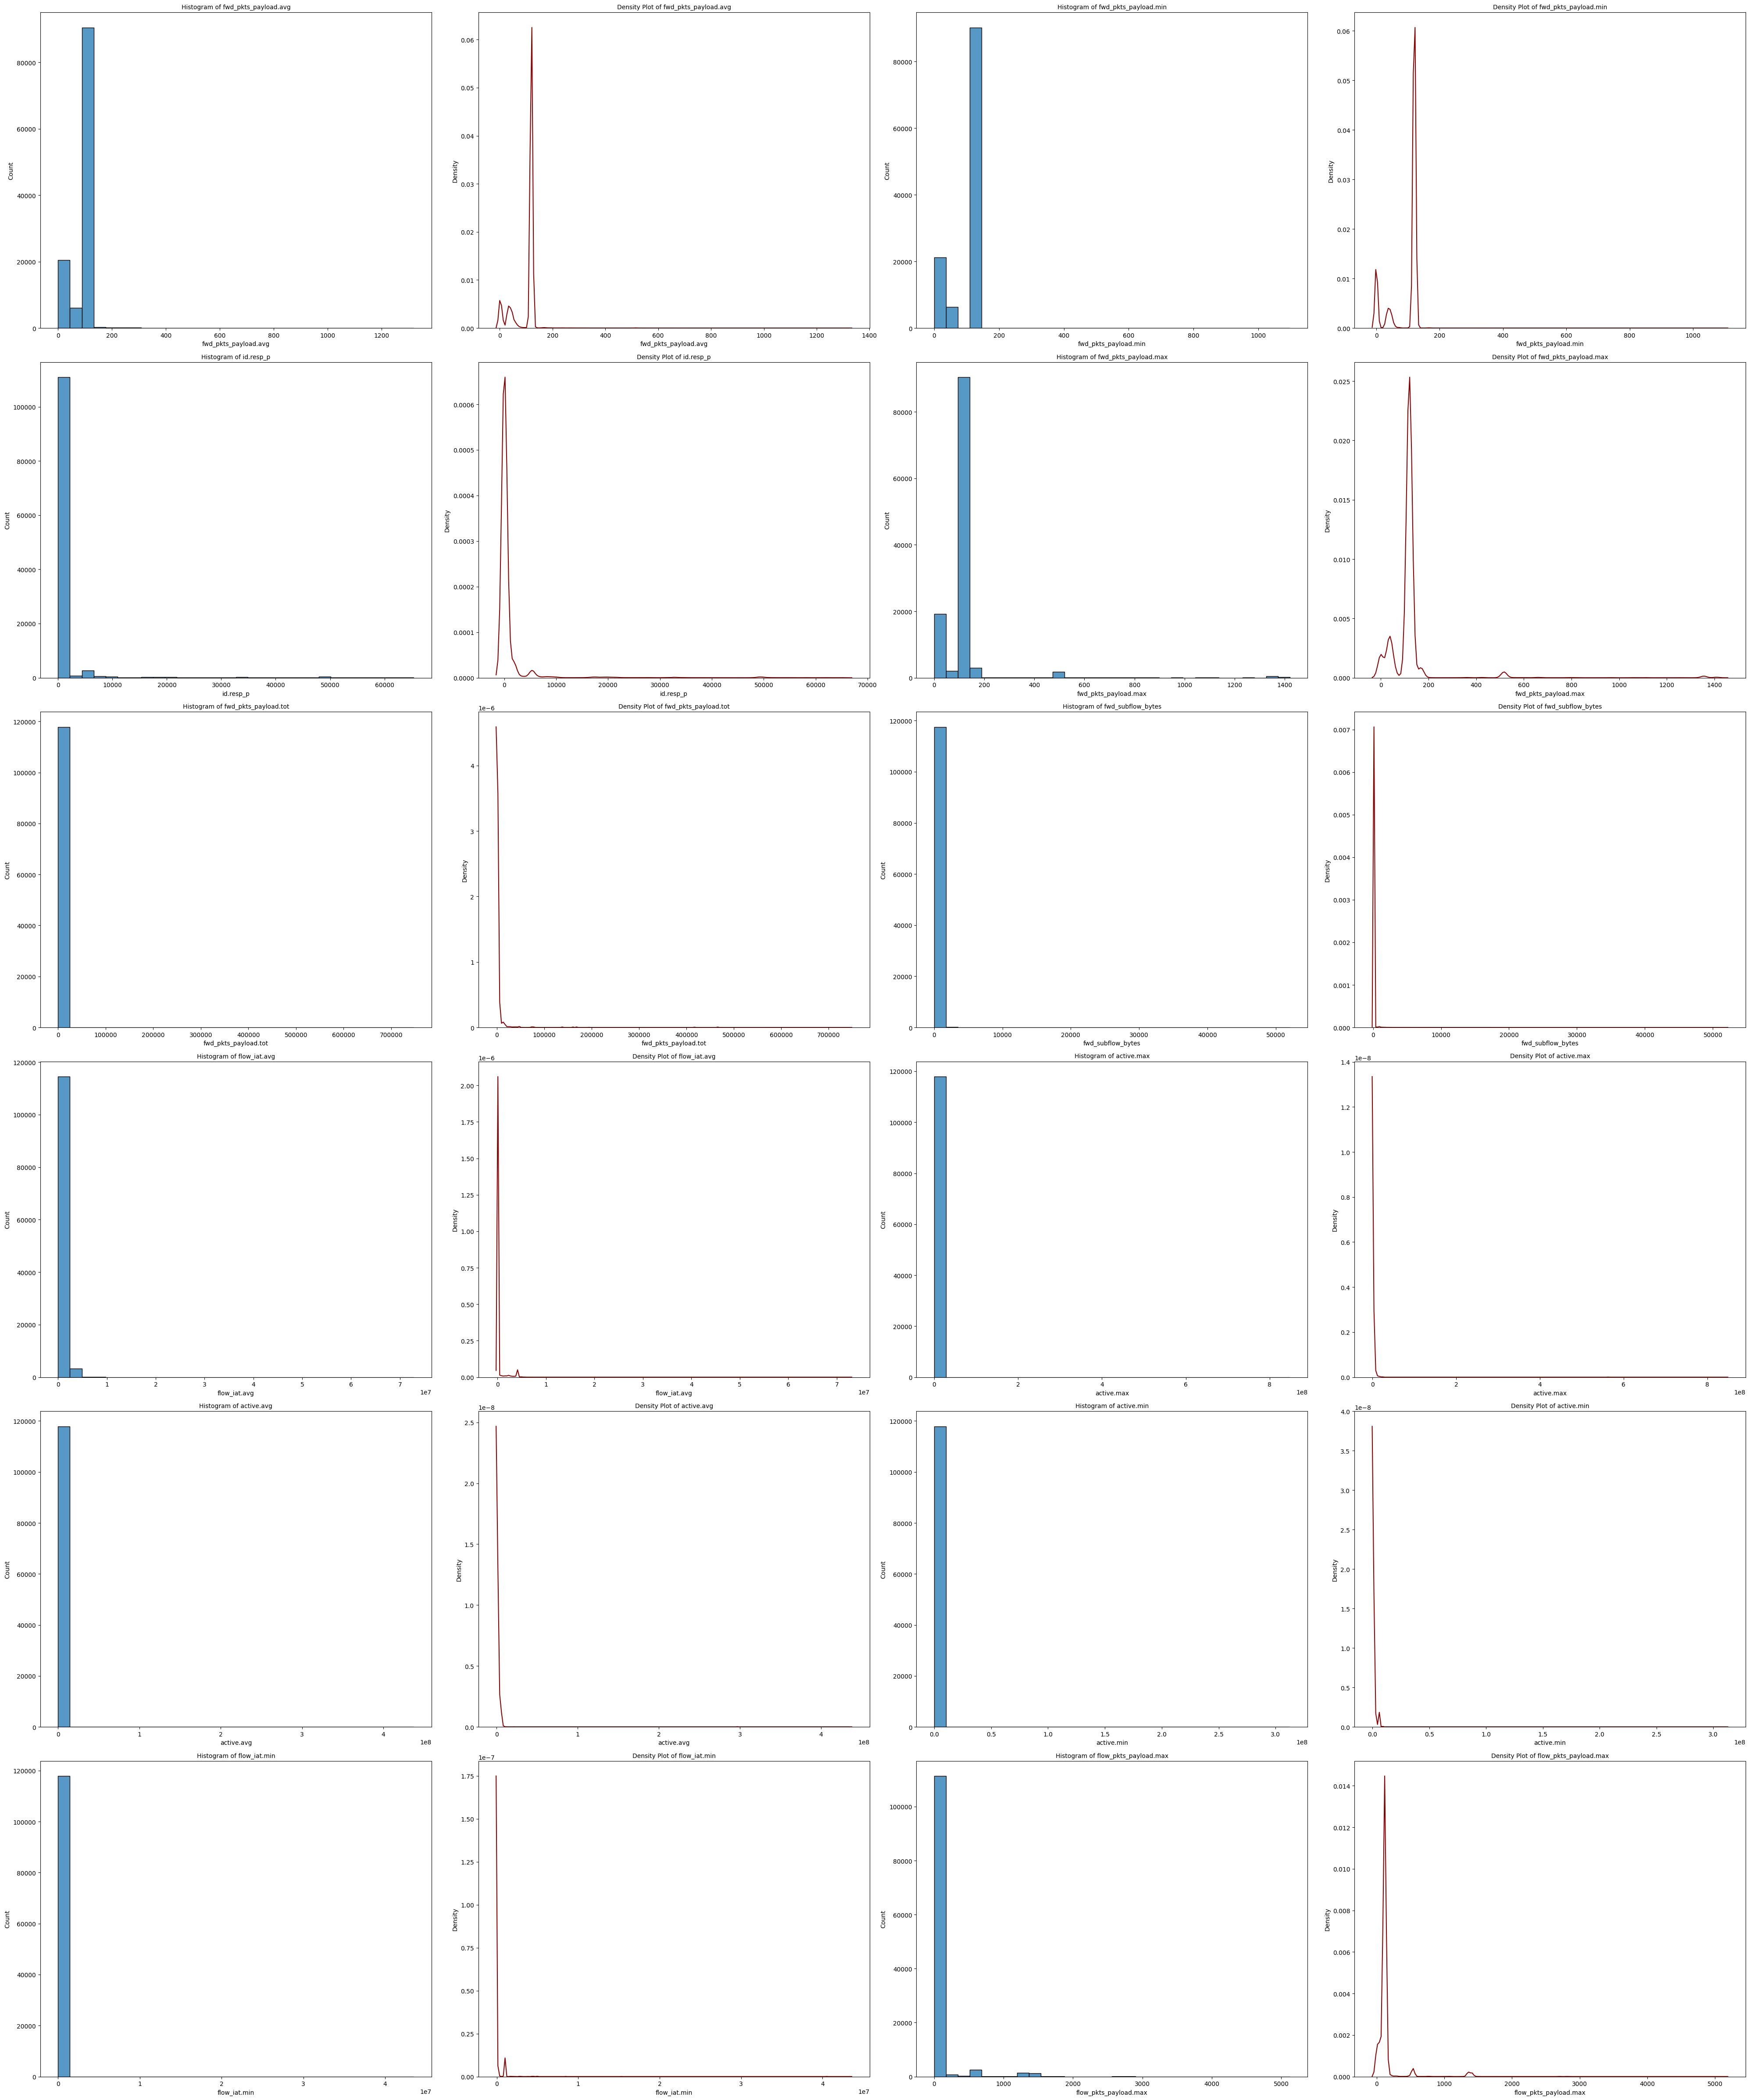

In [ ]:
import math

# Get feature names
feature_names = X_encoded.columns

# Get sorted indices of feature importances
sorted_indices = np.argsort(importances)[::-1]

# Get top 10 feature names
top_10_features = feature_names[sorted_indices[:12]]

# Adjust the features variable
features = top_10_features

# Define the number of columns and rows for the plot. We multiply the number of rows by 2 because we want to display 2 plots (histogram and density) for each feature.
n_cols = 4
n_rows = math.ceil(len(features) * 2 / n_cols)

# Set the figure size
fig, axs = plt.subplots(n_rows, n_cols, figsize=(10 * n_cols, 8 * n_rows))

# Flatten the axes
axs = axs.flatten()

# Enumerate over features and plot histogram and density plot for each one
for i, feature in enumerate(features):
    # Plot histogram
    sns.histplot(X_encoded[feature], bins=30, kde=False, ax=axs[2 * i])
    axs[2*i].set_title(f'Histogram of {feature}', fontsize=10)

    # Plot density
    sns.kdeplot(X_encoded[feature], color="darkred", ax=axs[2 * i + 1])
    axs[2*i+1].set_title(f'Density Plot of {feature}', fontsize=10)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

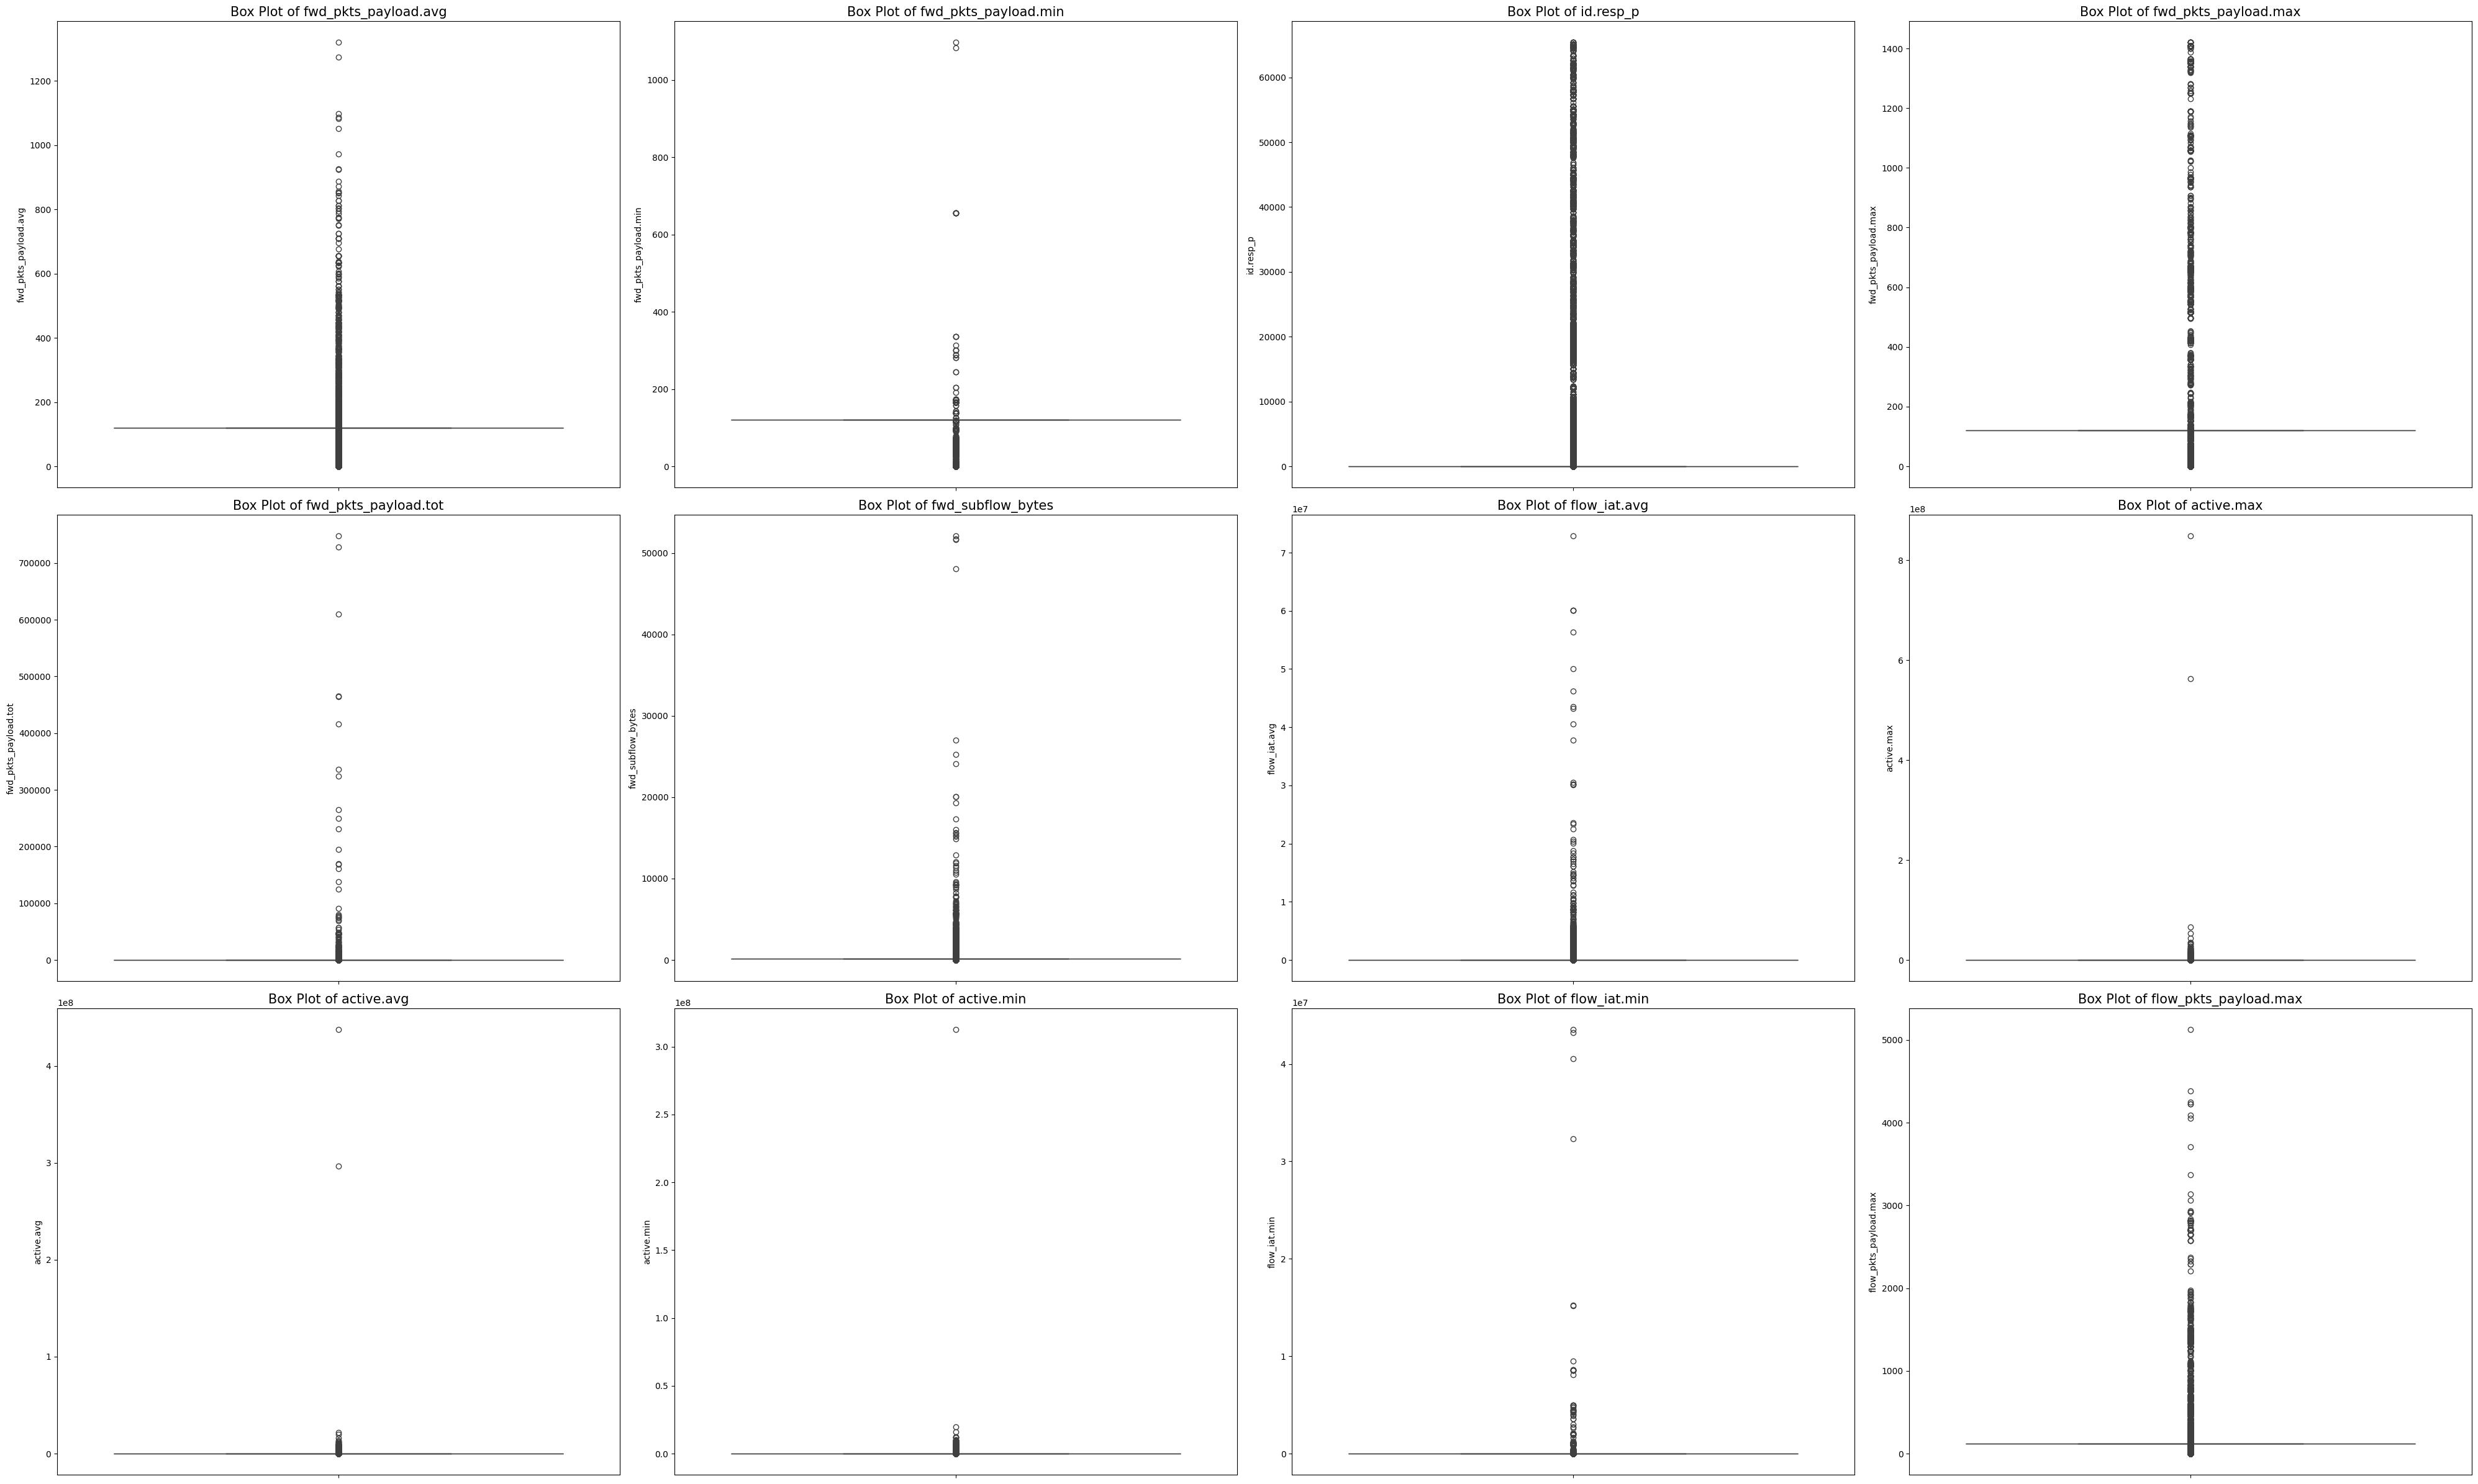

In [ ]:
# Get feature names
feature_names = X_encoded.columns

# Get sorted indices of feature importances
sorted_indices = np.argsort(importances)[::-1]

# Get top 10 feature names
top_10_features = feature_names[sorted_indices[:12]]

# Adjust the features variable
features = top_10_features

# Define the number of columns and rows for the plot
n_cols = 4
n_rows = math.ceil(len(features) / n_cols)

# Set the figure size
fig, axs = plt.subplots(n_rows, n_cols, figsize=(10 * n_cols, 8 * n_rows))

# Flatten the axes
axs = axs.flatten()

for i, feature in enumerate(features):
    # Plot boxplot
    sns.boxplot(y=X_encoded[feature], ax=axs[i])
    axs[i].set_title(f'Box Plot of {feature}', fontsize=15)

# Remove any unused subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Data Cleaning and Feature Engineering

In [4]:
# Check unique values in categorical columns
categorical_columns = ["proto", "service", "Attack_type"]
for column in categorical_columns:
    unique_values = data[column].unique()
    print(f"Unique values in '{column}' column: {unique_values}")
    print("\n")

Unique values in 'proto' column: ['tcp' 'udp' 'icmp']


Unique values in 'service' column: ['mqtt' '-' 'http' 'dns' 'ntp' 'ssl' 'dhcp' 'irc' 'ssh' 'radius']


Unique values in 'Attack_type' column: ['MQTT_Publish' 'Thing_Speak' 'Wipro_bulb' 'ARP_poisioning'
 'DDOS_Slowloris' 'DOS_SYN_Hping' 'Metasploit_Brute_Force_SSH'
 'NMAP_FIN_SCAN' 'NMAP_OS_DETECTION' 'NMAP_TCP_scan' 'NMAP_UDP_SCAN'
 'NMAP_XMAS_TREE_SCAN']




In [5]:
# Check numerical columns for negative values
numerical_columns = data.select_dtypes(include=["int64", "float64"]).columns
for column in numerical_columns:
    if (data[column] < 0).any():
        print(f"Negative values found in '{column}' column.")
    else:
        print(f"No negative values found in '{column}' column.")

No negative values found in 'id.orig_p' column.
No negative values found in 'id.resp_p' column.
No negative values found in 'flow_duration' column.
No negative values found in 'fwd_pkts_tot' column.
No negative values found in 'bwd_pkts_tot' column.
No negative values found in 'fwd_data_pkts_tot' column.
No negative values found in 'bwd_data_pkts_tot' column.
No negative values found in 'fwd_pkts_per_sec' column.
No negative values found in 'bwd_pkts_per_sec' column.
No negative values found in 'flow_pkts_per_sec' column.
No negative values found in 'down_up_ratio' column.
No negative values found in 'fwd_header_size_tot' column.
No negative values found in 'fwd_header_size_min' column.
No negative values found in 'fwd_header_size_max' column.
No negative values found in 'bwd_header_size_tot' column.
No negative values found in 'bwd_header_size_min' column.
No negative values found in 'bwd_header_size_max' column.
No negative values found in 'flow_FIN_flag_count' column.
No negative va

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117922 entries, 0 to 123116
Data columns (total 84 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id.orig_p                 117922 non-null  int64  
 1   id.resp_p                 117922 non-null  int64  
 2   proto                     117922 non-null  object 
 3   service                   117922 non-null  object 
 4   flow_duration             117922 non-null  float64
 5   fwd_pkts_tot              117922 non-null  int64  
 6   bwd_pkts_tot              117922 non-null  int64  
 7   fwd_data_pkts_tot         117922 non-null  int64  
 8   bwd_data_pkts_tot         117922 non-null  int64  
 9   fwd_pkts_per_sec          117922 non-null  float64
 10  bwd_pkts_per_sec          117922 non-null  float64
 11  flow_pkts_per_sec         117922 non-null  float64
 12  down_up_ratio             117922 non-null  float64
 13  fwd_header_size_tot       117922 non-null  int64 

In [7]:
# Optional: Label encoding for categorical columns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Verify changes
print("\nUpdated data types after label encoding:")
print(data.dtypes)


Updated data types after label encoding:
id.orig_p                 int64
id.resp_p                 int64
proto                     int32
service                   int32
flow_duration           float64
                         ...   
idle.std                float64
fwd_init_window_size      int64
bwd_init_window_size      int64
fwd_last_window_size      int64
Attack_type               int32
Length: 84, dtype: object


In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
data_min_max_scaled = pd.DataFrame(
    min_max_scaler.fit_transform(data[numerical_columns]), columns=numerical_columns
)

# Standardization
standard_scaler = StandardScaler()
data_standard_scaled = pd.DataFrame(
    standard_scaler.fit_transform(data[numerical_columns]), columns=numerical_columns
)


data_standard_scaled.dropna(inplace=True)
# Or replace infinite values with a large finite value:
data_standard_scaled.replace([np.inf, -np.inf], np.nan, inplace=True)
data_standard_scaled.fillna(1e9, inplace=True)  # Replace with a large finite value
print(data_standard_scaled.shape)

(117922, 81)


In [9]:
import numpy as np

# Log Transformation
skewed_columns = [
    "flow_duration",
    "fwd_pkts_tot",
]  # List of columns with skewed distribution
data_log_transformed = data.copy()
data_log_transformed[skewed_columns] = data_log_transformed[skewed_columns].apply(
    lambda x: np.log1p(x)
)

data_log_transformed.dropna(inplace=True)
# Or replace infinite values with a large finite value:
data_log_transformed.replace([np.inf, -np.inf], np.nan, inplace=True)
data_log_transformed.fillna(1e9, inplace=True)  # Replace with a large finite value
print(data_log_transformed.shape)

(117922, 84)


In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)  # Number of principal components to keep
data_pca = pd.DataFrame(
    pca.fit_transform(data[numerical_columns]), columns=[f"PC{i}" for i in range(1, 11)]
)

data_pca.dropna(inplace=True)
# Or replace infinite values with a large finite value:
data_pca.replace([np.inf, -np.inf], np.nan, inplace=True)
data_pca.fillna(1e9, inplace=True)  # Replace with a large finite value
print(data_pca.shape)

(117922, 10)


In [11]:
interaction_features = ["fwd_pkts_tot", "flow_duration"]  # Example interaction features
data_interaction = data.copy()
data_interaction["interaction"] = (
    data_interaction[interaction_features[0]]
    * data_interaction[interaction_features[1]]
)

data_interaction.dropna(inplace=True)
# Or replace infinite values with a large finite value:
data_interaction.replace([np.inf, -np.inf], np.nan, inplace=True)
data_interaction.fillna(1e9, inplace=True)  # Replace with a large finite value
print(data_interaction.shape)

(117922, 85)


In [12]:
data_domain_specific = data.copy()
data_domain_specific["flow_pkts_ratio"] = (
    data_domain_specific["fwd_pkts_tot"] / data_domain_specific["bwd_pkts_tot"]
)

data_domain_specific.dropna(inplace=True)
# Or replace infinite values with a large finite value:
data_domain_specific.replace([np.inf, -np.inf], np.nan, inplace=True)
data_domain_specific.fillna(1e9, inplace=True)  # Replace with a large finite value
print(data_domain_specific.shape)

(117922, 85)


In [13]:
data_encoded = pd.get_dummies(data, columns=["proto", "service"])

data_encoded.dropna(inplace=True)
# Or replace infinite values with a large finite value:
data_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)
data_encoded.fillna(1e9, inplace=True)  # Replace with a large finite value
print(data_encoded.shape)

(117922, 95)


In [14]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize RFE with Linear Regression estimator
estimator = LinearRegression()
rfe = RFE(estimator, n_features_to_select=10)  # Number of features to select
data_selected_features = rfe.fit_transform(data[numerical_columns], data["Attack_type"])

data_selected_features = pd.DataFrame(
    data_selected_features, columns=[f"feature_{i}" for i in range(1, 11)]
)
data_selected_features.dropna(inplace=True)
# Or replace infinite values with a large finite value:
data_selected_features.replace([np.inf, -np.inf], np.nan, inplace=True)
data_selected_features.fillna(1e9, inplace=True)  # Replace with a large finite value
print(data_selected_features.shape)

(117922, 10)


In [15]:
# Initialize an empty DataFrame to store the target encoded features
data_target_encoded = data.copy()

# Define the function for target encoding
def target_encode(df, column, target):
    return df.groupby(column)[target].transform("mean")

# Apply target encoding to categorical columns
categorical_columns = ["proto", "service"]
for column in categorical_columns:
    data_target_encoded[f"{column}_target_encoded"] = target_encode(
        data_target_encoded, column, "Attack_type"
    )

data_target_encoded.dropna(inplace=True)
# Or replace infinite values with a large finite value:
data_target_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)
data_target_encoded.fillna(1e9, inplace=True)  # Replace with a large finite value
print(data_target_encoded.shape)

(117922, 86)


In [17]:
# Split original and transformed datasets into features (X) and target (y)
X_original = data.drop(columns=["Attack_type"])
y_original = data["Attack_type"]

# Split data into training and testing sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_original, y_original, test_size=0.2, random_state=42
)

print("Original dataset:")
print(f"X_train_orig shape: {X_train_orig.shape}")
print(f"X_test_orig shape: {X_test_orig.shape}")
print(f"y_train_orig shape: {y_train_orig.shape}")
print(f"y_test_orig shape: {y_test_orig.shape}")

Original dataset:
X_train_orig shape: (94337, 83)
X_test_orig shape: (23585, 83)
y_train_orig shape: (94337,)
y_test_orig shape: (23585,)


# Model Development

In [18]:
# Models to train
models = {
    "Logistic Regression": LogisticRegression(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
}

# Dictionary to store classification reports
classification_reports = {}

### Training on original dataset

In [22]:
# Train and evaluate models on original dataset
for name, model in models.items():
    model.fit(X_train_orig, y_train_orig)
    y_pred_orig = model.predict(X_test_orig)
    classification_reports[f"{name} (Original)"] = classification_report(
        y_test_orig, y_pred_orig, output_dict=True, target_names=label_encoder.classes_.tolist()
    )

### Datasets using various Feature Engineering methods

In [19]:
# Feature engineering techniques (new DataFrames)
new_dataframes = {
    "Min-Max Scaling": data_min_max_scaled,
    "Standardization": data_standard_scaled,
    "Log Transformation": data_log_transformed,
    "PCA": data_pca,
    "Interaction Features": data_interaction,
    "Domain-specific Features": data_domain_specific,
    "Encoded Categorical Variables": data_encoded,
    "Selected Features (RFE)": data_selected_features,
    "Target Encoded Categorical Variables": data_target_encoded,
    # "Time-Series Features": data_time_series,
}

In [67]:
# print dataset name and shape of the dataset
for name, df in new_dataframes.items():
    print(f"{name}: {df.shape}")

Min-Max Scaling: (117922, 81)
Standardization: (117922, 81)
Log Transformation: (117922, 84)
PCA: (117922, 10)
Interaction Features: (117922, 85)
Domain-specific Features: (117922, 85)
Encoded Categorical Variables: (117922, 95)
Selected Features (RFE): (117922, 10)
Target Encoded Categorical Variables: (117922, 86)


In [ ]:
# Train and evaluate models on new datasets
for method, new_data in new_dataframes.items():
    try:
        X_new = new_data
        y_new = data["Attack_type"]
        X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
            X_new, y_new, test_size=0.2, random_state=42
        )
        print(f"Dataset shape for {method}: {X_new.shape}, {y_new.shape}, {X_train_new.shape}, {X_test_new.shape}, {y_train_new.shape}, {y_test_new.shape}")

        for name, model in models.items():
            model.fit(X_train_new, y_train_new)
            y_pred_new = model.predict(X_test_new)
            classification_reports[f"{name} ({method})"] = classification_report(
                y_test_new,
                y_pred_new,
                output_dict=True,
                target_names=label_encoder.classes_.tolist(),
            )
            print(f"Classification Report for {name} ({method}):\n{classification_reports[f'{name} ({method})']}\n{'='*80}\n")
    except Exception as e:
        print(f"Error in {method}: {e}")
        continue

### Save results

In [27]:
# save the classification reports to numpy file
np.save("classification_reports.npy", classification_reports)
print("Classification reports saved to 'classification_reports.npy' file.")

In [34]:
# load the classification reports from numpy file
classification_reports = np.load("classification_reports.npy", allow_pickle=True).item()

### Performance Comparison

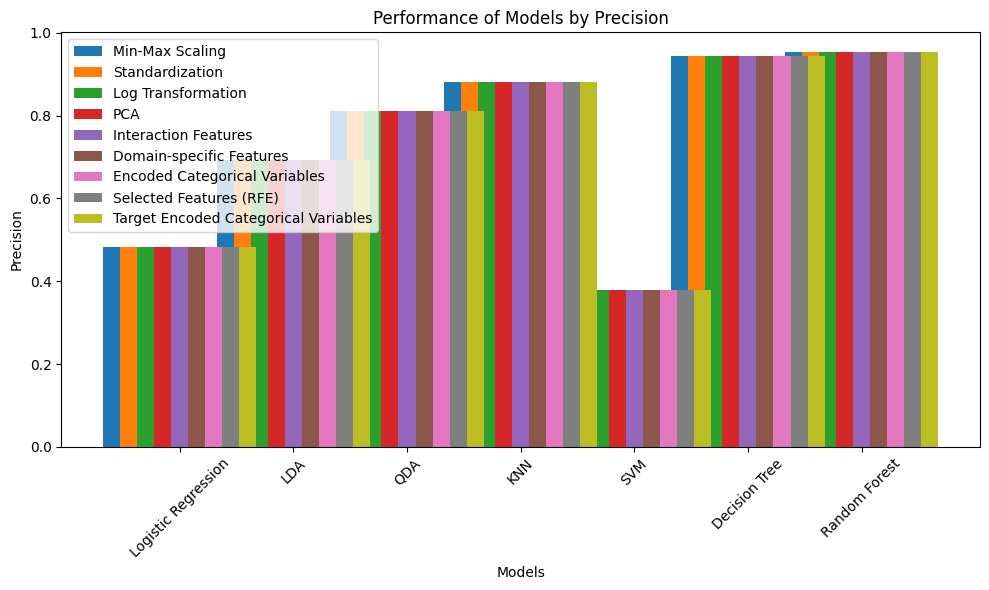

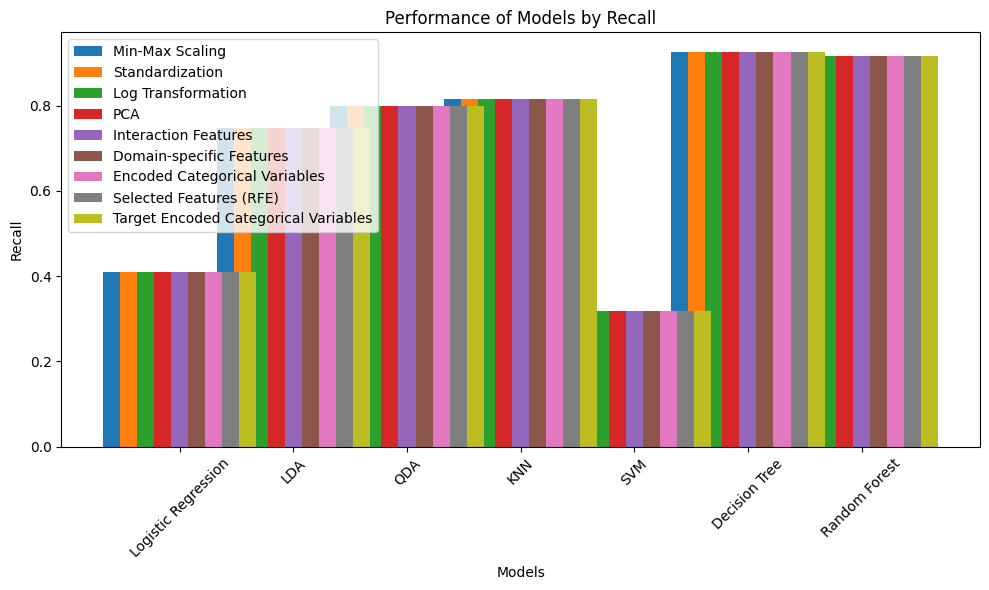

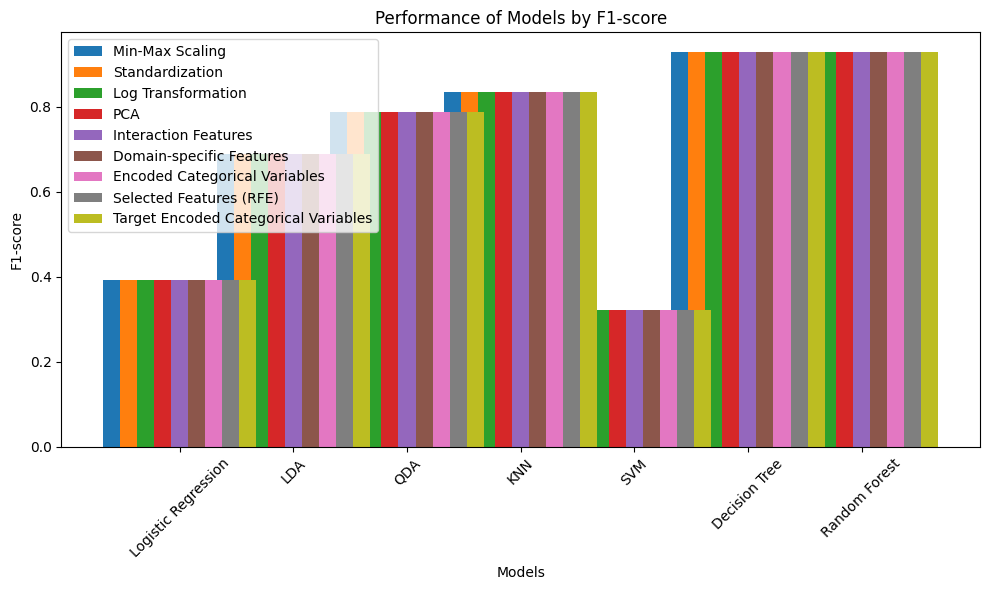

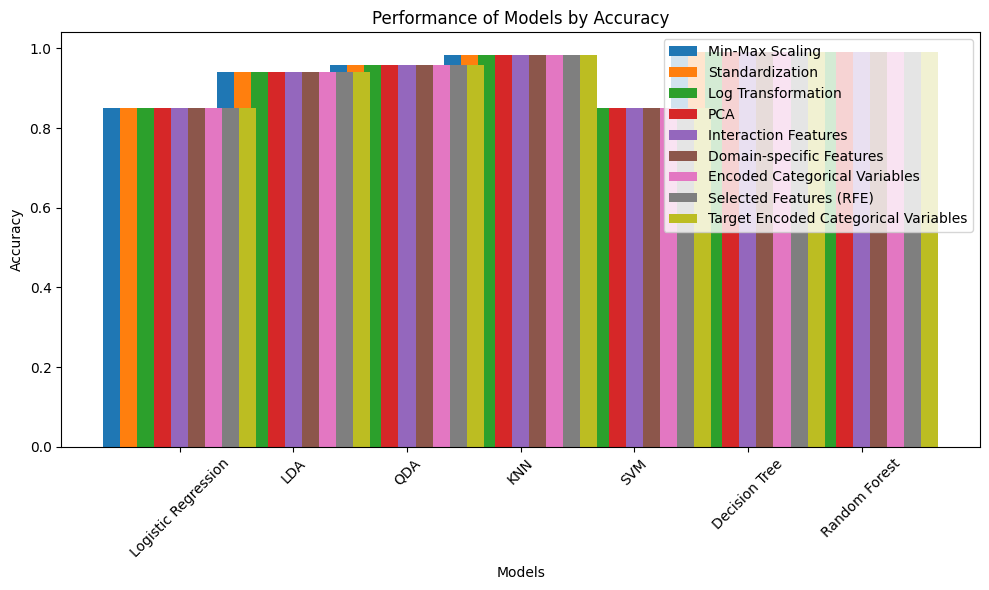

In [35]:
# Initialize lists to store metrics for each model and method
models_list = list(models.keys())
methods_list = list(new_dataframes.keys())
metrics = ["precision", "recall", "f1-score"]
accuracy = {model: [] for model in models_list}
metric_values = {metric: {model: [] for model in models_list} for metric in metrics}

max_values = {
    "precision" : {
        "model" : None,
        "method" : None,
        "value" : 0
    },
    "recall" : {
        "model" : None,
        "method" : None,
        "value" : 0
    },
    "f1-score" : {
        "model" : None,
        "method" : None,
        "value" : 0
    },
    "accuracy" : {
        "model" : None,
        "method" : None,
        "value" : 0
    }
}

# Extract metrics from classification reports
for name_method, report in classification_reports.items():
    model_name, method_name = name_method.split(" (", 1)
    method_name = method_name[:-1]  # Remove closing bracket
    for label, metrics_dict in report.items():
        # print(label, metrics_dict)
        if label not in ["accuracy", "macro avg", "weighted avg"]:
            for metric in metrics:
                metric_values[metric][model_name].append(metrics_dict[metric])
        elif label == "accuracy":
            accuracy[model_name].append(metrics_dict)

metrics.append("accuracy")
metric_values["accuracy"] = accuracy

# Plot performance for each metric
for metric in metrics:
    fig, ax = plt.subplots(figsize=(10, 6))
    x = np.arange(len(models_list))
    width = 0.15
    for i, method_name in enumerate(methods_list):
        mean_values = [np.mean(metric_values[metric][model]) for model in models_list]
        for mean_value in mean_values:
            if mean_value > max_values[metric]["value"]:
                max_values[metric]["value"] = mean_value
                max_values[metric]["model"] = models_list[mean_values.index(mean_value)]
                max_values[metric]["method"] = method_name             
        ax.bar(
            x + i * width,
            mean_values,
            width,
            label=method_name,
        )

    ax.set_xlabel("Models")
    ax.set_ylabel(metric.capitalize())
    ax.set_title(f"Performance of Models by {metric.capitalize()}")
    ax.set_xticks(x + width * len(methods_list) / 2 - width / 2)
    ax.set_xticklabels(models_list)
    ax.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

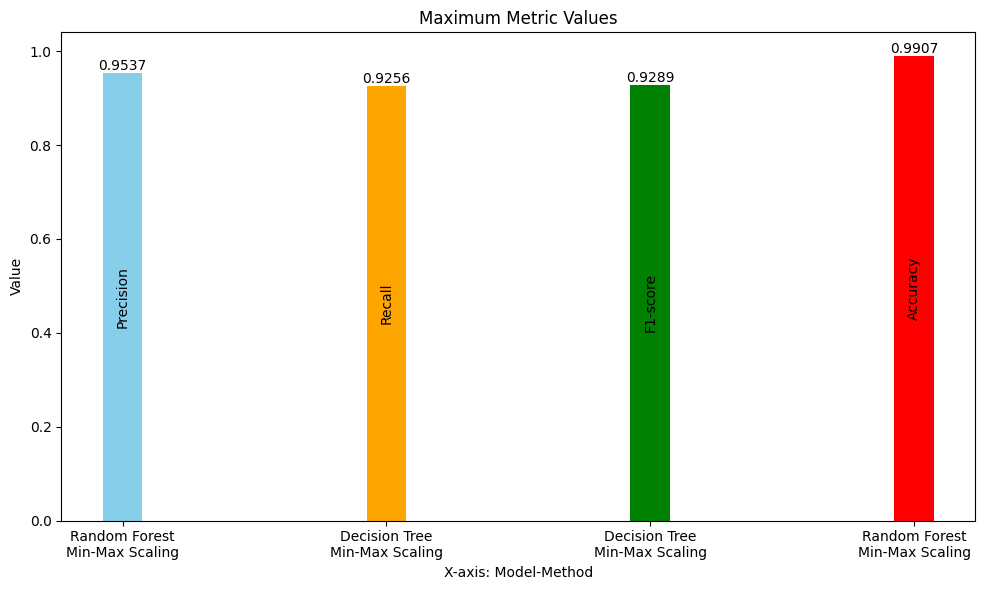

In [36]:
# Extract metric names, values, models, and methods from max_values dictionary
metrics_list = list(max_values.keys())
metric_values = [max_values[metric]["value"] for metric in metrics_list]
models_methods = [
    f"{max_values[metric]['model']}\n{max_values[metric]['method']}"
    for metric in metrics_list
]
legend_names = ["Precision", "Recall", "F1-score", "Accuracy"]

# Plot maximum metric values
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(metrics_list))
width = 0.15
bars = ax.bar(x, metric_values, width, color=["skyblue", "orange", "green", "red"])

# Add value as text on top of each bar
for bar, value, legend_name in zip(bars, metric_values, legend_names):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{value:.4f}",
        ha="center",
        va="bottom",
    )
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height()/2,
        legend_name,
        ha="center",
        va="center",
        rotation=90,
        color="black",
    )

ax.set_xlabel("X-axis: Model-Method")
ax.set_ylabel("Value")
ax.set_title("Maximum Metric Values")
ax.set_xticks(x)
ax.set_xticklabels(models_methods)
plt.xticks()
plt.tight_layout()
plt.show()

# Hyperparameter tuning-

For each of the models mentioned (Logistic Regression, LDA/QDA, KNN, SVM, Decision Trees, Random Forest), there are specific hyperparameters that you can tune to improve performance. Here's a brief overview of hyperparameters you can tune for each model:

1. **Logistic Regression**:
   - Penalty (L1 or L2 regularization)
   - Regularization strength (C)

2. **LDA/QDA** (Linear Discriminant Analysis / Quadratic Discriminant Analysis):
   - No hyperparameters to tune for LDA.
   - For QDA, regularization parameter (reg_param) can be tuned.

3. **KNN** (K-Nearest Neighbors):
   - Number of neighbors (n_neighbors)
   - Distance metric (e.g., Euclidean, Manhattan, Minkowski)

4. **SVM** (Support Vector Machines):
   - Kernel type (linear, polynomial, radial basis function (RBF), etc.)
   - Regularization parameter (C)
   - Kernel coefficient (gamma for RBF kernel)

5. **Decision Trees**:
   - Maximum depth of the tree (max_depth)
   - Minimum number of samples required to split an internal node (min_samples_split)
   - Minimum number of samples required to be at a leaf node (min_samples_leaf)
   - Criterion for split (e.g., Gini impurity, entropy)

6. **Random Forest**:
   - Number of trees in the forest (n_estimators)
   - Maximum depth of the trees (max_depth)
   - Minimum number of samples required to split an internal node (min_samples_split)
   - Minimum number of samples required to be at a leaf node (min_samples_leaf)
   - Criterion for split (e.g., Gini impurity, entropy)
   - Maximum number of features to consider for split (max_features)

These are just some of the hyperparameters you can tune for each model. The choice of hyperparameters to tune depends on the specific characteristics of your dataset and the nature of the problem you're trying to solve. It's recommended to perform hyperparameter tuning using techniques like grid search or randomized search to find the optimal combination of hyperparameters that maximizes performance on your validation set.

In [21]:
# Define hyperparameters grid for each model
param_grids = {
    "Logistic Regression": {"C": [0.1, 1, 10]},
    "KNN": {"n_neighbors": [3, 5, 7], "p": [1, 2]},
    "SVM": {"C": [0.1, 1, 10], "gamma": ["scale", "auto"]},
    "Decision Tree": {
        "max_depth": [None, 5, 10],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 5, 10],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
    },
}

# Train and evaluate tuned models on original dataset
tuned_models_classification_reports = {}

### Training of fine-tuned models

In [22]:
# Train and evaluate models using cross-validation
for name, model in models.items():
    model.fit(X_train_orig, y_train_orig)
    scores = cross_val_score(
        model, X_train_orig, y_train_orig, cv=5, scoring="accuracy"
    )
    y_pred = model.predict(X_test_orig)
    tuned_models_classification_reports[f"{name} (Original)"] = classification_report(
        y_test_orig,
        y_pred,
        output_dict=True,
        target_names=label_encoder.classes_.tolist(),
    )
    tuned_models_classification_reports[f"{name} (Original)"]["cross_val_accuracy"] = np.mean(scores)

In [ ]:
# Train and evaluate tuned models on new datasets
for method, new_data in new_dataframes.items():
    try:
        X_new = new_data
        y_new = data["Attack_type"]
        X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
            X_new, y_new, test_size=0.2, random_state=42
        )

        for name, model in models.items():
            if name in param_grids:
                model.fit(X_train_new, y_train_new)
                scores = cross_val_score(
                    model, X_train_new, y_train_new, cv=5, scoring="accuracy"
                )
                y_pred_new_tuned = model.predict(X_test_new)
                tuned_models_classification_reports[f"{name} ({method} - Tuned)"] = (
                    classification_report(
                        y_test_new,
                        y_pred_new_tuned,
                        output_dict=True,
                        target_names=label_encoder.classes_.tolist(),
                    )
                )
                tuned_models_classification_reports[f"{name} ({method} - Tuned)"][
                    "cross_val_accuracy"
                ] = np.mean(scores)
    except Exception as e:
        print(f"Error in {method}: {e}")
        continue

for name, report in tuned_models_classification_reports.items():
    print(f"Classification Report for {name}:\n{report}\n{'='*80}\n")

In [25]:
# save the classification reports to numpy file
np.save("tuned_models_classification_reports.npy", tuned_models_classification_reports)
print("Classification reports saved to 'tuned_models_classification_reports.npy' file.")

Classification reports saved to 'tuned_models_classification_reports.npy' file.


In [26]:
# # load the classification reports from numpy file
# tuned_models_classification_reports = np.load(
#     "tuned_models_classification_reports.npy", allow_pickle=True
# ).item()

### Performance comparison

In [ ]:
# Initialize lists to store metrics for each model and method
models_list = list(models.keys())
methods_list = list(new_dataframes.keys())
metrics = ["precision", "recall", "f1-score"]
accuracy = {model: [] for model in models_list}
cross_val_accuracy = {model: [] for model in models_list}
metric_values = {metric: {model: [] for model in models_list} for metric in metrics}

max_values = {
    "precision" : {
        "model" : None,
        "method" : None,
        "value" : 0
    },
    "recall" : {
        "model" : None,
        "method" : None,
        "value" : 0
    },
    "f1-score" : {
        "model" : None,
        "method" : None,
        "value" : 0
    },
    "accuracy" : {
        "model" : None,
        "method" : None,
        "value" : 0
    },
    "cross_val_accuracy" : {
        "model" : None,
        "method" : None,
        "value" : 0
    },
}

# Extract metrics from classification reports
for name_method, report in tuned_models_classification_reports.items():
    model_name, method_name = name_method.split(" (", 1)
    method_name = method_name[:-1]  # Remove closing bracket
    for label, metrics_dict in report.items():
        # print(label, metrics_dict)
        if label not in ["accuracy", "macro avg", "weighted avg", "cross_val_accuracy"]:
            for metric in metrics:
                metric_values[metric][model_name].append(metrics_dict[metric])
        elif label == "accuracy":
            accuracy[model_name].append(metrics_dict)
        elif label == "cross_val_accuracy":
            cross_val_accuracy[model_name].append(metrics_dict)


metrics.append("accuracy")
metrics.append("cross_val_accuracy")
metric_values["accuracy"] = accuracy
metric_values["cross_val_accuracy"] = cross_val_accuracy

# Plot performance for each metric
for metric in metrics:
    fig, ax = plt.subplots(figsize=(10, 6))
    x = np.arange(len(models_list))
    width = 0.15
    for i, method_name in enumerate(methods_list):
        mean_values = [np.mean(metric_values[metric][model]) for model in models_list]
        for mean_value in mean_values:
            if mean_value > max_values[metric]["value"]:
                max_values[metric]["value"] = mean_value
                max_values[metric]["model"] = models_list[mean_values.index(mean_value)]
                max_values[metric]["method"] = method_name             
        ax.bar(
            x + i * width,
            mean_values,
            width,
            label=method_name,
        )

    ax.set_xlabel("Models")
    ax.set_ylabel(metric.capitalize())
    ax.set_title(f"Performance of Models by {metric.capitalize()}")
    ax.set_xticks(x + width * len(methods_list) / 2 - width / 2)
    ax.set_xticklabels(models_list)
    ax.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

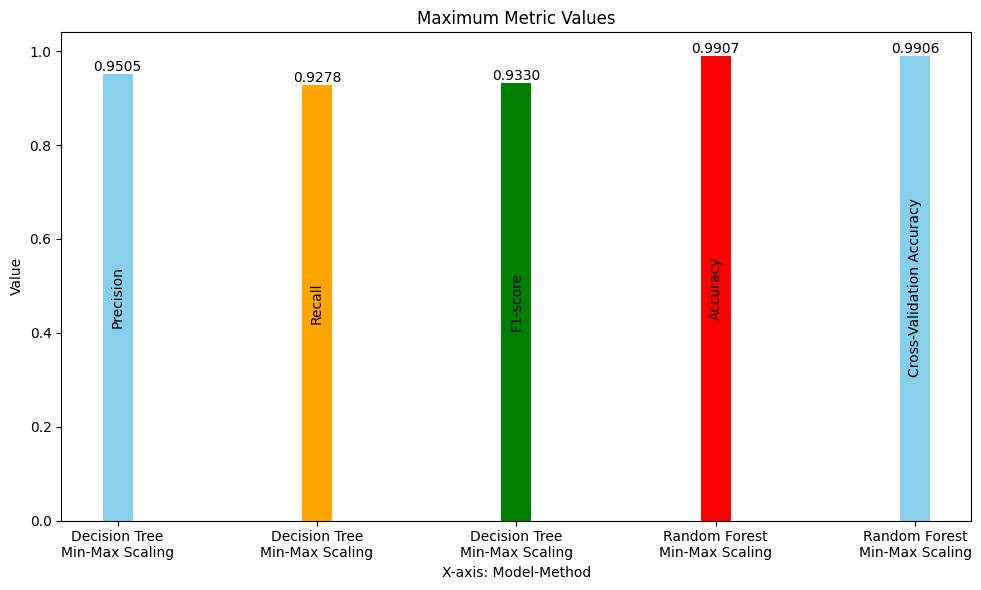

In [33]:
# Extract metric names, values, models, and methods from max_values dictionary
metrics_list = list(max_values.keys())
metric_values = [max_values[metric]["value"] for metric in metrics_list]
models_methods = [
    f"{max_values[metric]['model']}\n{max_values[metric]['method']}"
    for metric in metrics_list
]
legend_names = ["Precision", "Recall", "F1-score", "Accuracy", "Cross-Validation Accuracy"]

# Plot maximum metric values
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(metrics_list))
width = 0.15
bars = ax.bar(x, metric_values, width, color=["skyblue", "orange", "green", "red"])

# Add value as text on top of each bar
for bar, value, legend_name in zip(bars, metric_values, legend_names):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{value:.4f}",
        ha="center",
        va="bottom",
    )
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height()/2,
        legend_name,
        ha="center",
        va="center",
        rotation=90,
        color="black",
    )

ax.set_xlabel("X-axis: Model-Method")
ax.set_ylabel("Value")
ax.set_title("Maximum Metric Values")
ax.set_xticks(x)
ax.set_xticklabels(models_methods)
plt.xticks()
plt.tight_layout()
plt.show()

In [65]:
# confusion matrix for the best model
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the best model and method
best_model = max_values["accuracy"]["model"]
best_method = max_values["accuracy"]["method"]

# print the best model and method
print(f"Best model: {best_model}")
print(f"Best method: {best_method}")

# get the train and test data from the best method
X = new_dataframes[best_method]
y = data["Attack_type"]
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# get the best model and predict the test data
model = models[best_model]
model.fit(X_train_new, y_train_new)
y_pred = model.predict(X_test_new)

Best model: Random Forest
Best method: Min-Max Scaling


In [66]:
# get the classification report
classification_report_best = tuned_models_classification_reports[
    f"{best_model} ({best_method} - Tuned)"
]

print(f"precision: {classification_report_best['weighted avg']['precision']}")
print(f"recall: {classification_report_best['weighted avg']['recall']}")
print(f"f1-score: {classification_report_best['weighted avg']['f1-score']}")
print(f"accuracy: {classification_report_best['accuracy']}")
print(f"cross_val_accuracy: {classification_report_best['cross_val_accuracy']}")

precision: 0.9981387799729007
recall: 0.9981344074623701
f1-score: 0.9981260879017735
accuracy: 0.9981344074623701
cross_val_accuracy: 0.9978587388984307


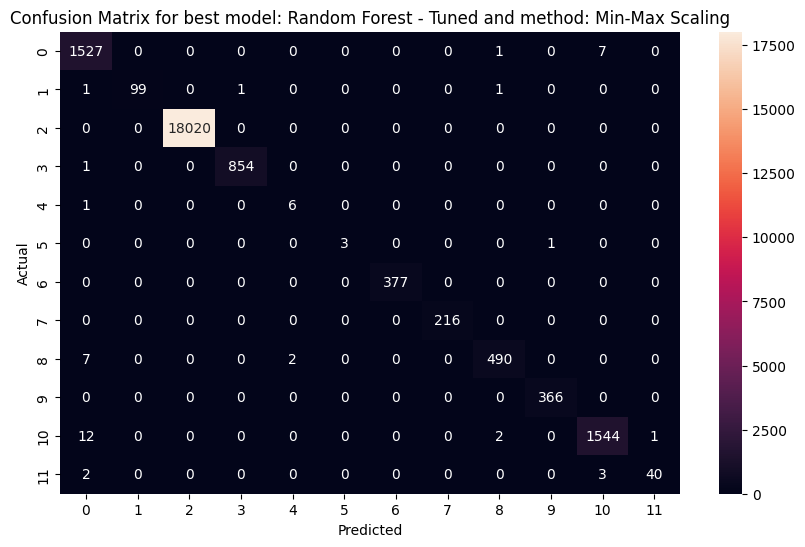

In [63]:
# Get the confusion matrix
conf_matrix = confusion_matrix(y_test_new, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(
    conf_matrix, annot=True, fmt="d", vmin=0
)  # Adjust vmin and vmax as needed
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(
    f"Confusion Matrix for best model: {best_model} - Tuned and method: {best_method}"
)
plt.show()